In [57]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

In [59]:
# import dataset
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data)
df.columns = diabetes.feature_names
df['target'] = diabetes.target
df = df[['s1', 's2', 's3', 's5', 'target']]

In [61]:
df.head()

,s1,s2,s3,s5,target
0,-0.044223,-0.034821,-0.043401,0.019908,151.0
1,-0.008449,-0.019163,0.074412,-0.068330,75.0
2,-0.045599,-0.034194,-0.032356,0.002864,141.0
3,0.012191,0.024991,-0.036038,0.022692,206.0
4,0.003935,0.015596,0.008142,-0.031991,135.0


In [63]:
df.shape

(442, 5)

In [65]:
# check for null values
df.isnull().any()

s1        False
s2        False
s3        False
s5        False
target    False
dtype: bool

In [67]:
# split data into training & test set
# set seed = 0
train, test = train_test_split(df, test_size = 0.1, random_state = 0)
print('Size of training dataset: ', train.shape)
print('Size of test dataset: ', test.shape)

Size of training dataset:  (397, 5)
Size of test dataset:  (45, 5)


In [69]:
# assign the features (x) and labels (y) accordingly

# let x in the training set be the variables without the target
# let y in the training set be target
x_train = train.iloc[:, :-1]
y_train = train['target']

# let x in the test set be the variables without the target
# let y in the test set be target
x_test = test.iloc[:, :-1]
y_test = test['target']

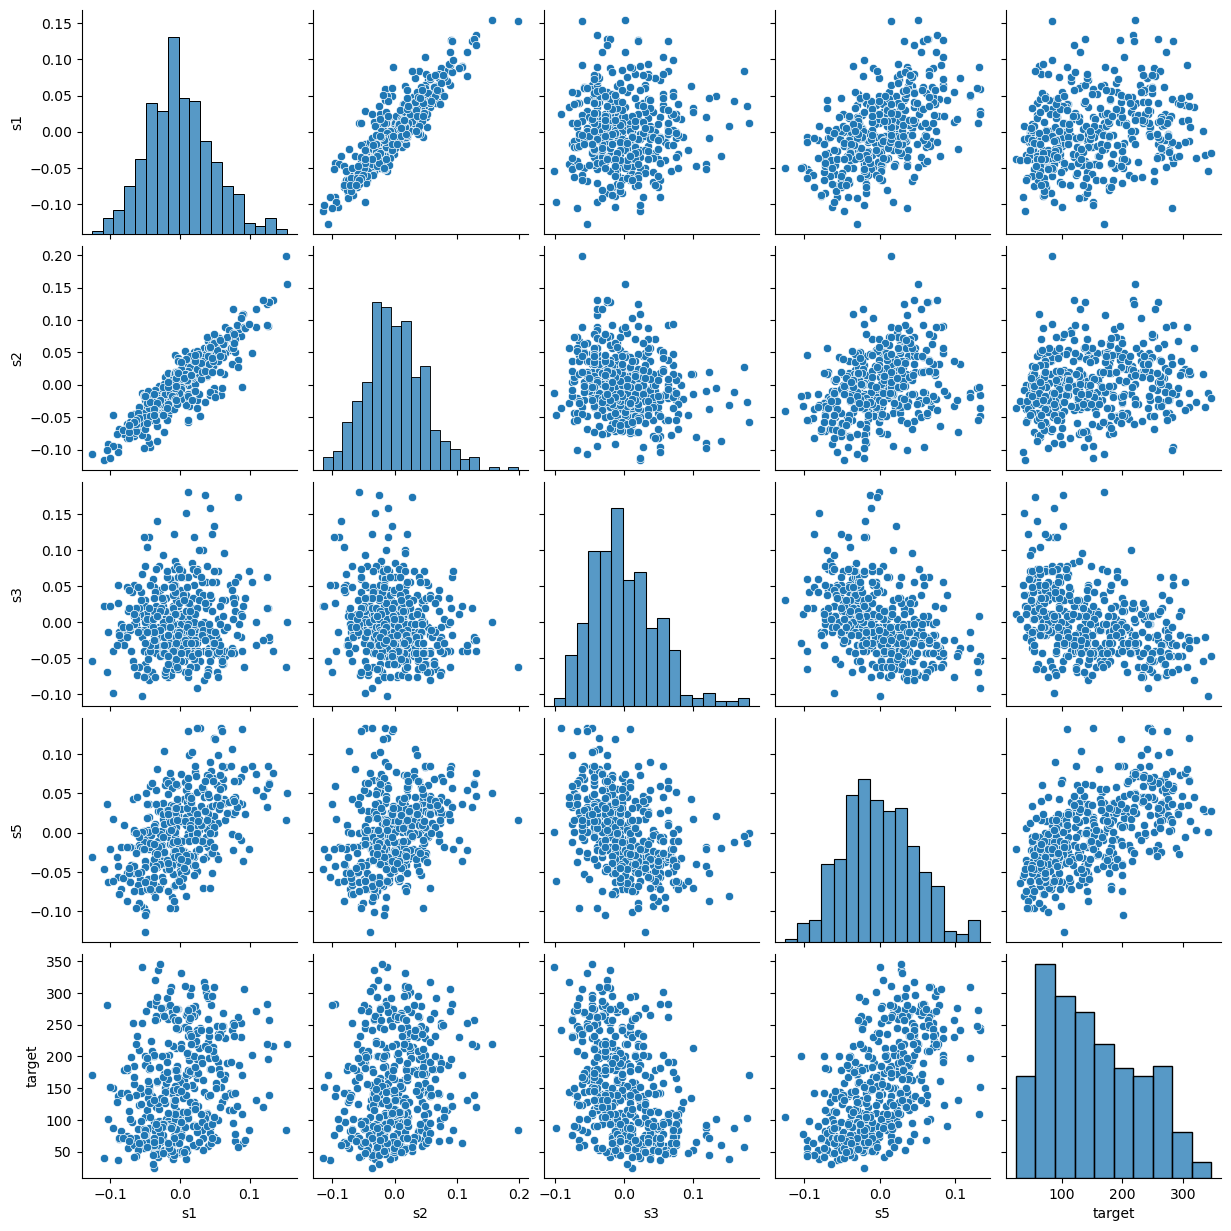

In [71]:
# data visualizations
# plot a pairplot
sns.pairplot(pd.DataFrame(df))
plt.show()

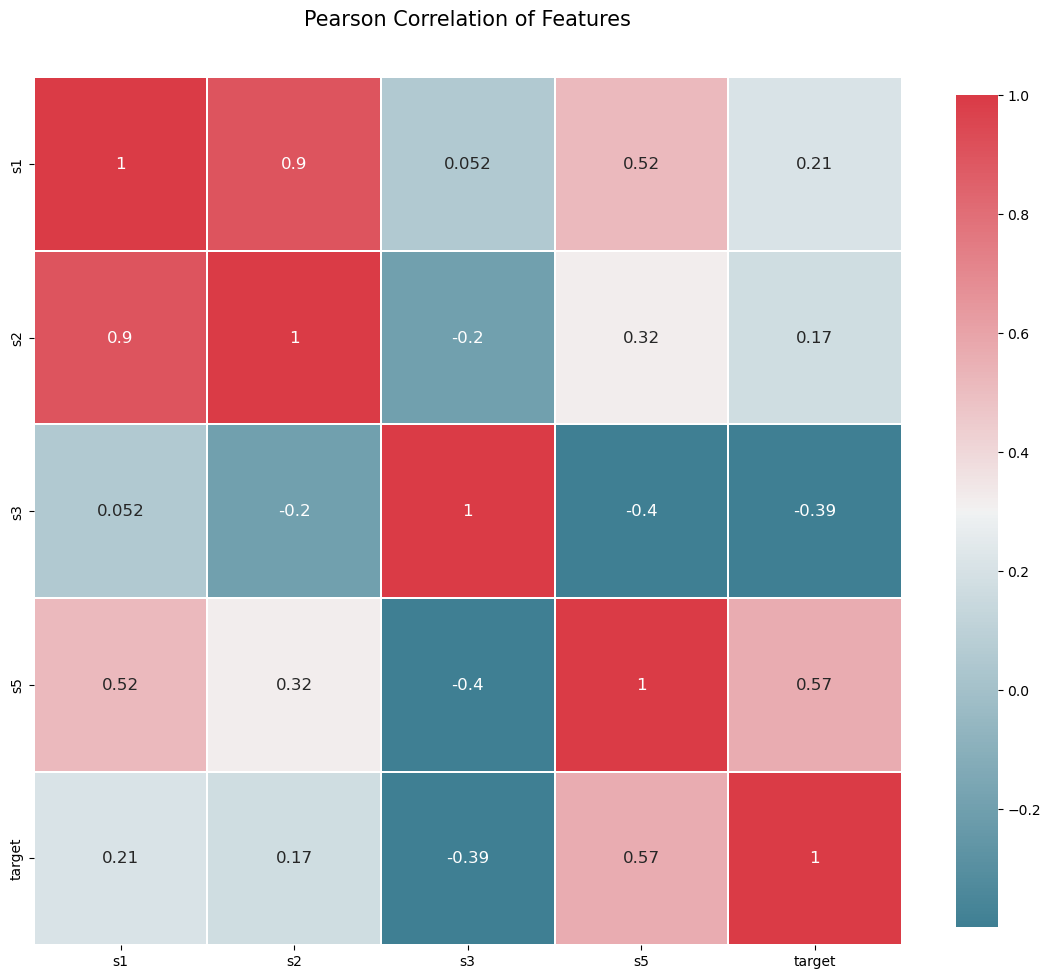

In [72]:
# data visualization
# plot a correlation heatmap
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(df)

In [39]:
# fit linear regression to training data
lr = linear_model.LinearRegression().fit(x_train, y_train)
print('Coefficients: \n', lr.coef_)

# explained variance score: 1 is perfect prediction
print('R^2: %.2f' % lr.score(x_train, y_train))

Coefficients: 
 [-798.6597359   654.42202076  -22.8328958  1125.19348639]
R^2: 0.37


In [75]:
# AIC (Akaike Information Criterion)
# statistical measures for model selection
# choosing the best model from a set of candidate models by balancing the goodness of fit with the complexity of model
# penalizing models with too many parameters to prevent overfitting
def AIC(train_data, train_label):
    from sklearn import linear_model
    linear_model = linear_model.LinearRegression().fit(train_data, train_label)
    predict_label = linear_model.predict(train_data)
    degree_freedom = train_data.shape[1]
    sample_size = train_data.shape[0]
    SSE = np.dot((train_label - predict_label), (train_label - predict_label))
    return sample_size * np.log(SSE/sample_size) + 2 * degree_freedom

In [77]:
# BIC (Bayesian Information Criterion)
# statistical measures for model selection
# choosing the best model from a set of candidate models by balancing the goodness of fit with the complexity of model
# penalizing models with too many parameters to prevent overfitting
def BIC(train_data, train_label):
    from sklearn import linear_model
    linear_model = linear_model.LinearRegression().fit(train_data, train_label)
    predict_label = linear_model.predict(train_data)
    degree_freedom = train_data.shape[1]
    sample_size = train_data.shape[0]
    SSE = np.dot((train_label - predict_label), (train_label - predict_label))
    return sample_size * np.log(SSE/sample_size) + np.log(sample_size) * degree_freedom

[('s1',), ('s2',), ('s3',), ('s5',)]
[3436.432980052028, 3444.307474831477, 3387.241994776359, 3295.765969128324]
[('s1', 's2'), ('s1', 's3'), ('s1', 's5'), ('s2', 's3'), ('s2', 's5'), ('s3', 's5')]
[3437.4891897353464, 3359.9021493684036, 3294.0424548221818, 3384.173956847142, 3297.746295627791, 3278.0121711699962]
[('s1', 's2', 's3'), ('s1', 's2', 's5'), ('s1', 's3', 's5'), ('s2', 's3', 's5')]
[3308.616643277109, 3276.8482608709146, 3279.6854124220004, 3279.94307769486]
[('s1', 's2', 's3', 's5')]
[3278.8328944022305]


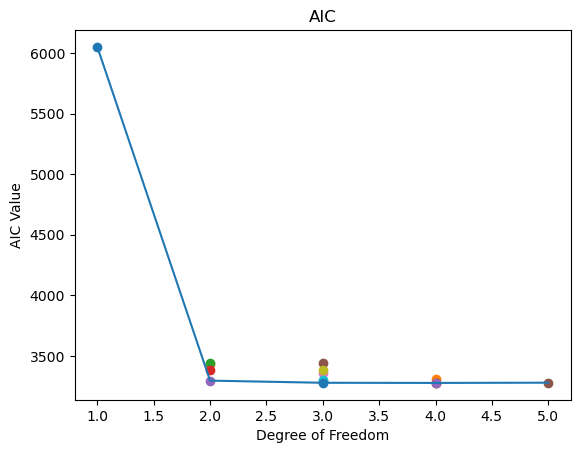

In [81]:
# plot AIC values
feature_names = list(x_train.columns.values)
min_AIC = []
min_AIC.append(y_train.var())
plt.scatter(1, y_train.var()) 
for i in range(1, 5):
    names = list(combinations(feature_names, i)) 
    print(names)
    aic_list = []    
    for each_element in names:
        aic_list.append(AIC(x_train[list(each_element)], y_train))
    min_AIC.append(np.min(aic_list))
    print(aic_list)
    for each_value in aic_list:
        plt.scatter(x = i + 1, y = each_value)  
        
plt.plot([1, 2, 3, 4, 5], min_AIC)
plt.title('AIC') 
plt.xlabel('Degree of Freedom')
plt.ylabel('AIC Value')
plt.show()

In [83]:
print('The minimum AICs are:',min_AIC)

The minimum AICs are: [6049.931277510621, 3295.765969128324, 3278.0121711699962, 3276.8482608709146, 3278.8328944022305]


[('s1',), ('s2',), ('s3',), ('s5',)]
[3440.416916332715, 3448.291411112164, 3391.225931057046, 3299.749905409011]
[('s1', 's2'), ('s1', 's3'), ('s1', 's5'), ('s2', 's3'), ('s2', 's5'), ('s3', 's5')]
[3445.457062296721, 3367.870021929778, 3302.010327383556, 3392.1418294085165, 3305.7141681891653, 3285.9800437313706]
[('s1', 's2', 's3'), ('s1', 's2', 's5'), ('s1', 's3', 's5'), ('s2', 's3', 's5')]
[3320.56845211917, 3288.800069712976, 3291.6372212640617, 3291.8948865369216]
[('s1', 's2', 's3', 's5')]
[3294.7686395249793]


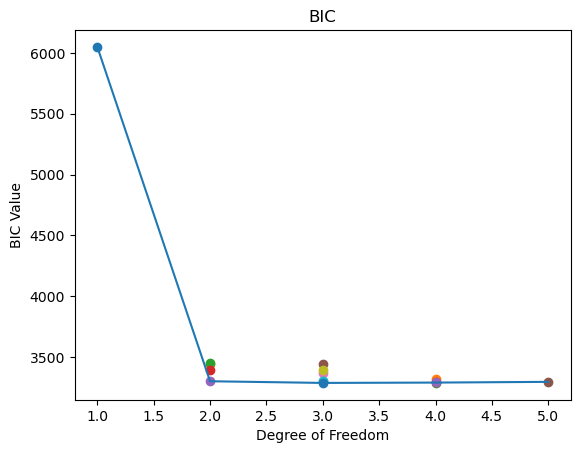

In [85]:
# plot BIC values
feature_names = list(x_train.columns.values)
min_BIC = []
min_BIC.append(y_train.var())
plt.scatter(1, y_train.var()) #when there is only the intercept term, plot variance
for i in range(1, 5):
    names = list(combinations(feature_names, i)) #generate the combination of i feature names and convert it to a list
    print(names)
    bic_list = []  #define a list to store BIC values
    for each_element in names:
        bic_list.append(BIC(x_train[list(each_element)], y_train))  #append BIC values to the list
    print(bic_list)
    min_BIC.append(np.min(bic_list))
    for each_value in bic_list:
        plt.scatter(x = i + 1, y = each_value) #plot BIC values
plt.plot([1, 2, 3, 4, 5], min_BIC)
plt.title('BIC')
plt.xlabel('Degree of Freedom')
plt.ylabel('BIC Value')
plt.show()

In [87]:
print('The minimum BICs are:',min_BIC)

The minimum BICs are: [6049.931277510621, 3299.749905409011, 3285.9800437313706, 3288.800069712976, 3294.7686395249793]
